In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
neurips_BM_atac = sc.read_h5ad("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/data/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")

In [3]:
neurips_BM_atac

AnnData object with n_obs × n_vars = 69249 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [4]:
neurips_BM_atac.uns

{'ATAC_gene_activity_var_names': array(['OR4F5', 'OR4F29', 'OR4F16', ..., 'DAZ4', 'BPY2C', 'CDY1'],
       dtype=object),
 'dataset_id': 'openproblems_bmmc_multiome',
 'genome': 'GRCh38',
 'organism': 'human'}

In [5]:
neurips_BM_atac.obs.columns


Index(['GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors',
       'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments',
       'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction',
       'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'],
      dtype='object')

In [6]:
neurips_BM_atac.obs[["DonorNumber", "batch",'Site']]

,DonorNumber,batch,Site
TAGTTGTCACCCTCAC-1-s1d1,donor1,s1d1,site1
CTATGGCCATAACGGG-1-s1d1,donor1,s1d1,site1
CCGCACACAGGTTAAA-1-s1d1,donor1,s1d1,site1
TCATTTGGTAATGGAA-1-s1d1,donor1,s1d1,site1
ACCACATAGGTGTCCA-1-s1d1,donor1,s1d1,site1
...,...,...,...
AAACCGCGTTTGAGGC-12-s4d9,donor9,s4d9,site4
TGACTTAAGTTCCCGT-12-s4d9,donor9,s4d9,site4
GCTGTACCACCGTTCC-12-s4d9,donor9,s4d9,site4
ACACTTGCAACTAGAA-12-s4d9,donor9,s4d9,site4


In [7]:
neurips_BM_atac_s1d1 = neurips_BM_atac[neurips_BM_atac.obs.batch =="s1d1"]

In [8]:
neurips_BM_atac_s1d1

View of AnnData object with n_obs × n_vars = 6224 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [9]:
neurips_BM_atac_s1d1.layers["counts"]

<6224x129921 sparse matrix of type '<class 'numpy.float32'>'
	with 29000285 stored elements in Compressed Sparse Row format>

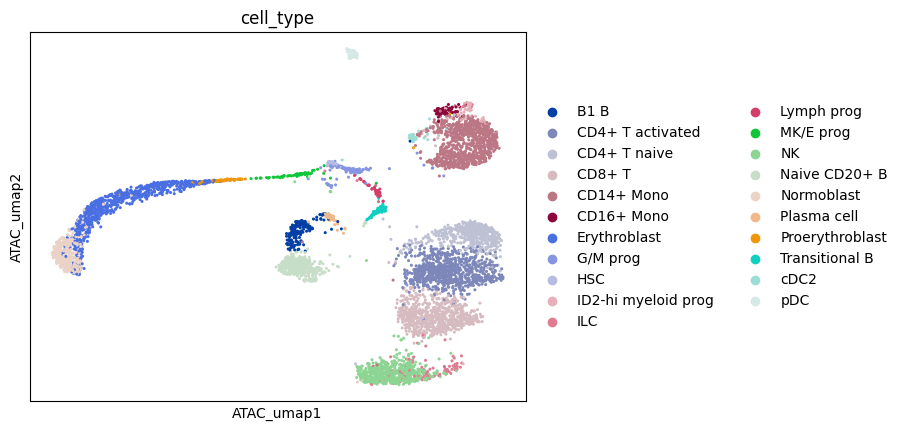

In [10]:
sc.pl.embedding(neurips_BM_atac_s1d1, basis='ATAC_umap', color="cell_type")

In [11]:
neurips_BM_atac_s1d1.layers['counts']

<6224x129921 sparse matrix of type '<class 'numpy.float32'>'
	with 29000285 stored elements in Compressed Sparse Row format>

In [12]:
neurips_BM_atac_s1d1.var["feature_types"]

AL627309.5                  GEX
LINC01409                   GEX
LINC01128                   GEX
NOC2L                       GEX
KLHL17                      GEX
                           ... 
GL000219.1-90062-90937     ATAC
GL000219.1-99257-100160    ATAC
KI270726.1-27152-28034     ATAC
KI270713.1-21434-22336     ATAC
KI270713.1-29629-30491     ATAC
Name: feature_types, Length: 129921, dtype: category
Categories (2, object): ['ATAC', 'GEX']

In [13]:
neurips_BM_atac_s1d1.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
NOC2L,GEX,ENSG00000188976
KLHL17,GEX,ENSG00000187961
...,...,...
GL000219.1-90062-90937,ATAC,NaN
GL000219.1-99257-100160,ATAC,NaN
KI270726.1-27152-28034,ATAC,NaN
KI270713.1-21434-22336,ATAC,NaN


In [14]:
neurips_BM_atac_s1d1_only_atac_features = neurips_BM_atac_s1d1[:,neurips_BM_atac_s1d1.var.feature_types == "ATAC"]

In [15]:
neurips_BM_atac_s1d1_only_atac_features.obs

,GEX_pct_counts_mt,GEX_n_counts,GEX_n_genes,GEX_size_factors,GEX_phase,ATAC_nCount_peaks,ATAC_atac_fragments,ATAC_reads_in_peaks_frac,ATAC_blacklist_fraction,ATAC_nucleosome_signal,...,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker
TAGTTGTCACCCTCAC-1-s1d1,1.061008,1508.0,1022,0.453484,S,4031.0,5400,0.746481,0.003473,0.642468,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CTATGGCCATAACGGG-1-s1d1,0.604230,1655.0,1081,0.455631,G2M,8636.0,19266,0.448251,0.003126,1.220679,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CCGCACACAGGTTAAA-1-s1d1,0.650069,7230.0,3304,2.435348,G2M,4674.0,6177,0.756678,0.001284,0.692573,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TCATTTGGTAATGGAA-1-s1d1,0.812274,1108.0,793,0.347226,G2M,2803.0,4019,0.697437,0.000714,0.633838,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
ACCACATAGGTGTCCA-1-s1d1,1.674770,1851.0,1219,0.534205,G2M,1790.0,2568,0.697040,0.003352,0.727660,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGACCCGGTTATCCTA-1-s1d1,0.387097,3100.0,1824,1.073692,G2M,13036.0,18936,0.688424,0.001534,0.832646,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
GACCTAAGTGCCTCAC-1-s1d1,1.292351,2863.0,1672,0.871723,G2M,4527.0,6628,0.683011,0.001325,0.688988,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
AGCTCATAGCTATATG-1-s1d1,0.607903,1974.0,1272,0.631238,G2M,5023.0,6772,0.741731,0.003584,0.757433,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TACGTACAGGAAACTG-1-s1d1,1.628664,921.0,682,0.276327,G2M,3208.0,4279,0.749708,0.004364,0.668293,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker


In [16]:
neurips_BM_atac_s1d1[:,neurips_BM_atac_s1d1.var.feature_types == "ATAC"]

View of AnnData object with n_obs × n_vars = 6224 × 116490
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism', 'cell_type_colors'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [17]:
neurips_BM_atac_s1d1_only_atac_features.layers["counts"]

<6224x116490 sparse matrix of type '<class 'numpy.float32'>'
	with 20453045 stored elements in Compressed Sparse Row format>

In [18]:
neurips_BM_atac_s1d1_counts = neurips_BM_atac_s1d1_only_atac_features.layers["counts"].todense()

In [19]:
neurips_BM_atac_s1d1_counts

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
neurips_BM_atac_s1d1_only_atac_features.obs[['cell_type']].value_counts()

cell_type          
CD14+ Mono             921
CD4+ T activated       836
Erythroblast           797
CD8+ T                 725
NK                     591
CD4+ T naive           543
Normoblast             387
Naive CD20+ B          386
B1 B                   201
G/M prog               110
ILC                    102
pDC                     92
Transitional B          83
ID2-hi myeloid prog     67
CD16+ Mono              66
Proerythroblast         65
MK/E prog               64
Plasma cell             59
Lymph prog              52
HSC                     41
cDC2                    36
Name: count, dtype: int64

In [21]:
neurips_BM_atac_s1d1_counts_df = pd.DataFrame(neurips_BM_atac_s1d1_counts)

In [22]:
neurips_BM_atac_s1d1_counts_df.columns = neurips_BM_atac_s1d1_only_atac_features.var_names
neurips_BM_atac_s1d1_counts_df.index = neurips_BM_atac_s1d1_only_atac_features.obs_names

In [23]:
neurips_BM_atac_s1d1_counts_df

,chr1-9776-10668,chr1-180726-181005,chr1-181117-181803,chr1-191133-192055,chr1-267562-268456,chr1-629497-630394,chr1-633515-634474,chr1-778276-779191,chr1-816868-817761,chr1-822804-823597,...,GL000195.1-137376-138301,GL000219.1-39933-40839,GL000219.1-42172-43054,GL000219.1-44703-45584,GL000219.1-45726-46450,GL000219.1-90062-90937,GL000219.1-99257-100160,KI270726.1-27152-28034,KI270713.1-21434-22336,KI270713.1-29629-30491
TAGTTGTCACCCTCAC-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
CTATGGCCATAACGGG-1-s1d1,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCGCACACAGGTTAAA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCATTTGGTAATGGAA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCACATAGGTGTCCA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGACCCGGTTATCCTA-1-s1d1,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
GACCTAAGTGCCTCAC-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGCTCATAGCTATATG-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
TACGTACAGGAAACTG-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
cell_IDs = pd.DataFrame(neurips_BM_atac_s1d1.obs.index.str.split("-").str[:-1].str.join('-'))

In [30]:
cell_IDs.columns = ["celIDs"]
cell_IDs.head()

,celIDs
0,TAGTTGTCACCCTCAC-1
1,CTATGGCCATAACGGG-1
2,CCGCACACAGGTTAAA-1
3,TCATTTGGTAATGGAA-1
4,ACCACATAGGTGTCCA-1


In [31]:
cell_IDs.to_csv("../../data/NeurIPS_BM_scmultiome/03_cell_IDs/NeurIPS_BM_s1d1_cellIDs.csv")

In [32]:
neurips_BM_atac_s1d1.obs.to_csv("../../data/NeurIPS_BM_scmultiome/03_cell_IDs/NeurIPS_BM_s1d1_metadata.csv")

## -------------------------------------------------------------------------------------------------
## ------------------------------------------------------------------------------------------------

## neurips_BM_atac_s1d1 has both GEX and atac matrix concetenated. subset this to only atac

In [33]:
neurips_BM_atac_s1d1_only_atac = neurips_BM_atac_s1d1[:,neurips_BM_atac_s1d1.var.feature_types == "ATAC"]

In [34]:
neurips_BM_atac_s1d1_only_atac.layers

LayersView with keys: counts

In [35]:
neurips_BM_atac_s1d1_only_atac.write_h5ad("../../data/NeurIPS_BM_scmultiome/03_NeurIPS_objects/neurips_BM_atac_s1d1.h5ad")

# ------------------------------

In [38]:
neurips_BM_atac_s1d1_only_atac.uns

{'ATAC_gene_activity_var_names': array(['OR4F5', 'OR4F29', 'OR4F16', ..., 'DAZ4', 'BPY2C', 'CDY1'],
       dtype=object),
 'dataset_id': 'openproblems_bmmc_multiome',
 'genome': 'GRCh38',
 'organism': 'human',
 'cell_type_colors': array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
        '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
        '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
        '#0fcfc0', '#9cded6', '#d5eae7'], dtype='<U7')}

In [36]:
pd.DataFrame.from_dict(neurips_BM_atac_s1d1_only_atac.uns).to_csv("../../data/NeurIPS_BM_scmultiome/03_NeurIPS_objects/NeurIPS_BM_s1d1_uns.csv")


ValueError: All arrays must be of the same length

In [218]:
neurips_BM_atac_s1d1_only_atac.var.to_csv("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_vars.csv")

In [219]:
neurips_BM_atac_s1d1.obsm

AxisArraysView with keys: ATAC_gene_activity, ATAC_lsi_full, ATAC_lsi_red, ATAC_umap, GEX_X_pca, GEX_X_umap

In [174]:
from scipy import sparse, io

In [220]:
io.mmwrite("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_lsi_full.mtx", neurips_BM_atac_s1d1_only_atac.obsm["ATAC_lsi_full"])

In [221]:
np.savetxt("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_lsi_full.txt", neurips_BM_atac_s1d1_only_atac.obsm["ATAC_lsi_full"], fmt='%d')

In [222]:
np.savetxt("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_umap.txt", neurips_BM_atac_s1d1_only_atac.obsm["ATAC_umap"], fmt='%d')

In [223]:
io.mmwrite("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_lsi_red.mtx", neurips_BM_atac_s1d1_only_atac.obsm["ATAC_lsi_red"])

In [224]:
io.mmwrite("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_umap.mtx", neurips_BM_atac_s1d1_only_atac.obsm["ATAC_umap"])

In [230]:
io.mmwrite("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_gene_activity.mtx", neurips_BM_atac_s1d1_only_atac.obsm["ATAC_gene_activity"])

In [226]:
neurips_BM_atac_s1d1_only_atac.layers["counts"]

<6224x116490 sparse matrix of type '<class 'numpy.float32'>'
	with 20453045 stored elements in Compressed Sparse Row format>

In [227]:
io.mmwrite("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_X.mtx", neurips_BM_atac_s1d1_only_atac.X)

In [228]:
io.mmwrite("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/outs/NeurIPS_BM_s1d1_ATAC_raw_counts.mtx", neurips_BM_atac_s1d1_only_atac.layers["counts"])

In [229]:
neurips_BM_atac_s1d1[:,neurips_BM_atac_s1d1.var.feature_types == "ATAC"]

/home/altay/miniconda3/envs/python_3.10.10_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


View of AnnData object with n_obs × n_vars = 6224 × 116490
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

/home/altay/miniconda3/envs/python_3.10.10_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/altay/miniconda3/envs/python_3.10.10_env/lib/python3.10/site-packages/scanpy/plotting/_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/altay/miniconda3/envs/python_3.10.10_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/altay/miniconda3/env

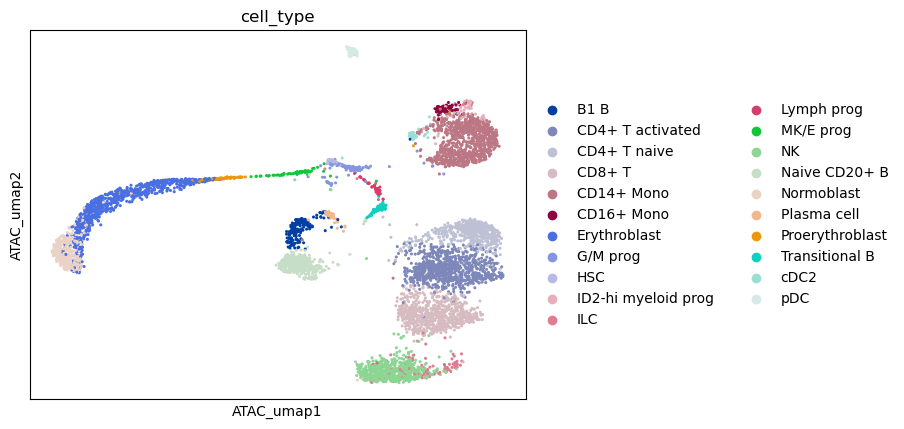

In [233]:
sc.pl.embedding(neurips_BM_atac_s1d1_only_atac, basis='ATAC_umap', color="cell_type")

In [239]:
neurips_BM_atac_s1d1_only_atac.obsp

PairwiseArrays with keys: 

In [235]:
sc.pl.pca(neurips_BM_atac_s1d1_only_atac)

KeyError: "Could not find 'pca' or 'X_pca' in .obsm"

In [234]:
neurips_BM_atac_s1d1_only_atac

AnnData object with n_obs × n_vars = 6224 × 116490
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism', 'cell_type_colors'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [202]:
neurips_BM_atac_s1d1.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
NOC2L,GEX,ENSG00000188976
KLHL17,GEX,ENSG00000187961
...,...,...
GL000219.1-90062-90937,ATAC,NaN
GL000219.1-99257-100160,ATAC,NaN
KI270726.1-27152-28034,ATAC,NaN
KI270713.1-21434-22336,ATAC,NaN


In [150]:
neurips_BM_atac_s1d1_slim = neurips_BM_atac_s1d1.copy()

# --------------------------------------------------------------
# --------------------------------------------------------------

In [151]:
del neurips_BM_atac_s1d1_slim.layers

In [161]:
neurips_BM_atac_s1d1_slim.obsm["ATAC_gene_activity"]

<6224x19039 sparse matrix of type '<class 'numpy.float32'>'
	with 33079646 stored elements in Compressed Sparse Column format>

In [152]:
neurips_BM_atac_s1d1_slim


AnnData object with n_obs × n_vars = 6224 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'

In [153]:
del neurips_BM_atac_s1d1.layers


In [159]:
neurips_BM_atac_s1d1_slim


AnnData object with n_obs × n_vars = 6224 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'

In [156]:
import hdf5plugin
neurips_BM_atac_s1d1_slim.write_h5ad(
    "/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/export_Anndata/neurips_BM_atac_s1d1_slim2.h5ad",
    compression=hdf5plugin.FILTERS["zstd"]
)

In [112]:
import hdf5plugin
neurips_BM_atac_s1d1_slim.write_h5ad(
    "/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/export_Anndata/neurips_BM_atac_s1d1_small.h5ad"
)

In [106]:
import hdf5plugin
neurips_BM_atac_s1d1.write_h5ad(
    "/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/01_get_cCRE_by_cell_matrix/export_Anndata/neurips_BM_atac_s1d1_opt2.h5ad"
)slim

In [29]:
neurips_BM_atac_s1d1_counts_df_small = neurips_BM_atac_s1d1_counts_df.iloc[0:10, 0:10]

In [30]:
neurips_BM_atac_s1d1_counts_df_small

,chr1-9776-10668,chr1-180726-181005,chr1-181117-181803,chr1-191133-192055,chr1-267562-268456,chr1-629497-630394,chr1-633515-634474,chr1-778276-779191,chr1-816868-817761,chr1-822804-823597
TAGTTGTCACCCTCAC-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
CTATGGCCATAACGGG-1-s1d1,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0
CCGCACACAGGTTAAA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
TCATTTGGTAATGGAA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCACATAGGTGTCCA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
TGGATTGGTTTGCGAA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTGAGCGAGTAAAGGT-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
GACTTAGGTTGCGCGA-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
GCCTTACTCGTTACAA-1-s1d1,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0
GTAAGGTCAATAACCT-1-s1d1,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0


In [36]:
neurips_BM_atac_s1d1_counts_df_small["chr1-9776-10668"]

TAGTTGTCACCCTCAC-1-s1d1    0.0
CTATGGCCATAACGGG-1-s1d1    0.0
CCGCACACAGGTTAAA-1-s1d1    0.0
TCATTTGGTAATGGAA-1-s1d1    0.0
ACCACATAGGTGTCCA-1-s1d1    0.0
TGGATTGGTTTGCGAA-1-s1d1    0.0
GTGAGCGAGTAAAGGT-1-s1d1    0.0
GACTTAGGTTGCGCGA-1-s1d1    0.0
GCCTTACTCGTTACAA-1-s1d1    0.0
GTAAGGTCAATAACCT-1-s1d1    0.0
Name: chr1-9776-10668, dtype: float32

In [37]:
for i in neurips_BM_atac_s1d1_counts_df_small.columns:
    print(i.split("-"))
    non_Zero = neurips_BM_atac_s1d1_counts_df_small[(neurips_BM_atac_s1d1_counts_df_small[i] > 0).any(1)]
    # get non-zero row
    print(non_Zero)

['chr1', '9776', '10668']


TypeError: Series.any() takes 1 positional argument but 2 were given